<a href="https://colab.research.google.com/github/chaurasiauttkarsh/Natural-Language-Processing/blob/master/IMDB_Subwords_with_Single_Layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data**

Loading the libraries

In [1]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 51kB/s 
     |████████████████████████████████| 3.8MB 58.7MB/s 
     |████████████████████████████████| 450kB 55.1MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf

print(tf.__version__)

2.0.0


Downloading the data

In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteFOINAZ/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteFOINAZ/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteFOINAZ/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


Loading the tokeniser

In [0]:
tokenizer = info.features['text'].encoder

**Preprocessing the Data**

Dividing the data into train and test

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

**Model**

Building the model

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


Compiling the model

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

training the model

In [8]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 1034s 3s/step - loss: 0.5402 - accuracy: 0.7196 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 976s 2s/step - loss: 0.3580 - accuracy: 0.8594 - val_loss: 0.5177 - val_accuracy: 0.7502
Epoch 3/10
391/391 [==============================] - 965s 2s/step - loss: 0.3905 - accuracy: 0.8274 - val_loss: 0.4406 - val_accuracy: 0.8324
Epoch 4/10
391/391 [==============================] - 966s 2s/step - loss: 0.3394 - accuracy: 0.8610 - val_loss: 0.5370 - val_accuracy: 0.7219
Epoch 5/10
391/391 [==============================] - 969s 2s/step - loss: 0.4833 - accuracy: 0.7668 - val_loss: 0.5052 - val_accuracy: 0.7739
Epoch 6/10
391/391 [==============================] - 965s 2s/step - loss: 0.3267 - accuracy: 0.8688 - val_loss: 0.5235 - val_accuracy: 0.7308
Epoch 7/10
391/391 [==============================] - 1001s 3s/step - loss: 0.2444 - accuracy: 0.9074 - val_loss: 0.4316 - val_accura

Plotting the accuracy and loss

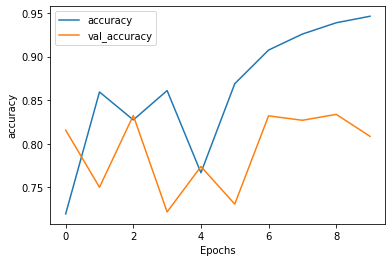

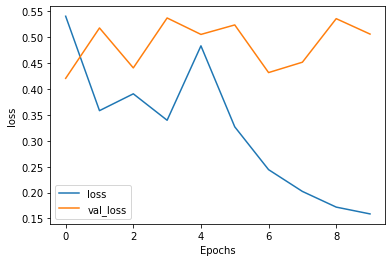

In [9]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')

plot_graphs(history, 'loss')